# Chart Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data

source: http://insideairbnb.com/get-the-data.html

Here I'm using the Airbnb London listings summary data

In [3]:
df = pd.read_csv('data/listings.csv',index_col=False)
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9554,"Cozy, 3 minutes to Piccadilly Line",31655,Guy,NaN,Haringey,51.587767,-0.105666,Private room,35,1,133,2018-08-13,1.69,4,299
1,39387,Stylish bedsit in Notting Hill ish flat.,168920,Alec,NaN,Westminster,51.525888,-0.199425,Private room,35,3,7,2018-07-15,0.13,1,0
2,90663,11: Heart of London - Charing Cross,488602,Harumi,NaN,Westminster,51.507800,-0.122597,Entire home/apt,231,4,9,2018-05-14,0.20,2,289


## Bar Charts
with all the chart attributes you need to show

### Standard Bars

#### How many listings for each room type?

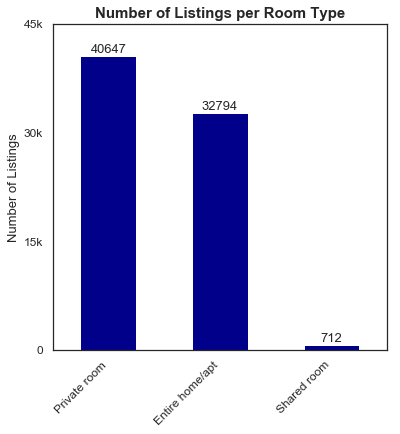

In [112]:

ax = df['room_type'].value_counts().plot.bar(color='darkblue',figsize=(6,6),fontsize=14)


plt.title('Number of Listings per Room Type',fontsize=15,fontweight='bold')
plt.ylabel('Number of Listings',fontsize=13)

# customize ticks for clean looks
ax.set_yticks([0,15000,30000,45000])
ax.set_yticklabels(['0','15k','30k','45k'], fontsize=12)
ax.set_xticklabels(df['room_type'].unique(),fontsize=12)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# make data labels
labels = df['room_type'].value_counts()
rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.005, label,
            ha='center', va='bottom',fontsize=13)

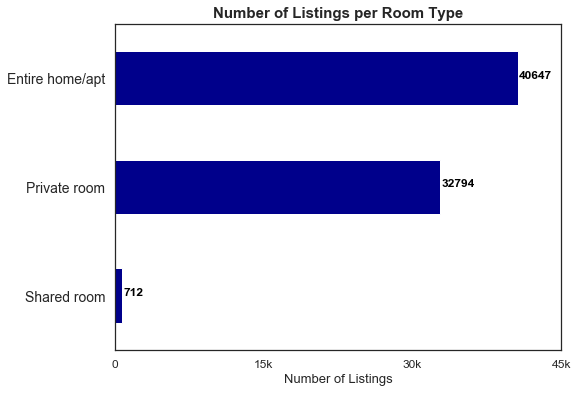

In [111]:
# same charts but with horizontal bar

ax = df['room_type'].value_counts().sort_values(ascending=True).plot.barh(color='darkblue',figsize=(8,6),fontsize=14)

plt.title('Number of Listings per Room Type',fontsize=15,fontweight='bold')
plt.xlabel('Number of Listings',fontsize=13)

# customize ticks for clean looks
ax.set_xticks([0,15000,30000,45000])
ax.set_xticklabels(['0','15k','30k','45k'], fontsize=12)
#ax.set_xticklabels(df['room_type'].unique(),fontsize=12)

# make data labels
labels = df['room_type'].value_counts().sort_values(ascending=True)
rects = ax.patches
for i, v in enumerate(labels):
    ax.text(v + 100, i , str(v), color='black', fontweight='bold',fontsize=12)

### Stacked

Now say we want to know the distribution of room types in top neighbourhoods. First we see which neighbourhoods have the most listings and we will visualize only the top 5.

In [14]:
top_neighbourhoods = df.neighbourhood.value_counts().sort_values(ascending=False)[:5]
top_neighbourhoods

Westminster               7885
Tower Hamlets             7247
Hackney                   5653
Kensington and Chelsea    5274
Camden                    5124
Name: neighbourhood, dtype: int64

Next we make the charts

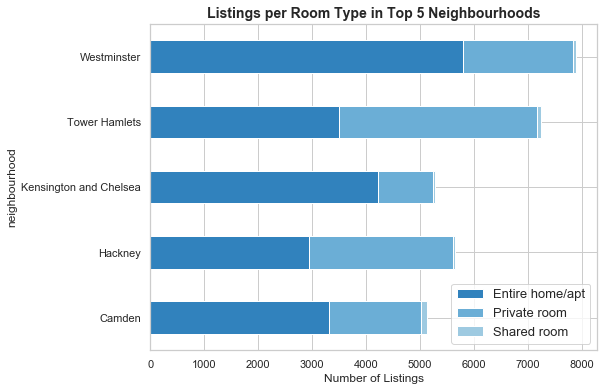

In [68]:
sns.set(style='whitegrid')
# pick color
cmap=plt.cm.get_cmap('tab20c')
colors = [cmap(0),cmap(1),cmap(2)]

#draw chart
df[df.neighbourhood.isin(top_neighbourhoods.index)].groupby(['neighbourhood','room_type'])['id'].count().unstack('room_type').plot.barh(stacked=True
                                                                                                                                       ,color = colors
                                                                                                                                     ,figsize=(8,6))
plt.title('Listings per Room Type in Top 5 Neighbourhoods',fontsize=14,fontweight='bold')
plt.legend(['Entire home/apt','Private room','Shared room'],fontsize=13)
plt.xlabel('Number of Listings')


### 100% Stacked

This is a modification of https://python-graph-gallery.com/13-percent-stacked-barplot/

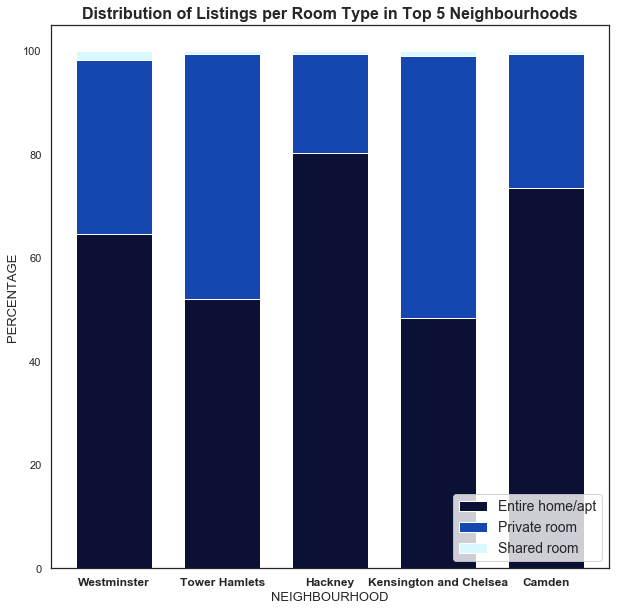

In [120]:
# Data
r = range(1,6)
data = df[df.neighbourhood.isin(top_neighbourhoods.index)].groupby(['neighbourhood','room_type'])['id'].count().unstack('room_type')
 
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(data['Entire home/apt'], data['Private room'], data['Shared room'])]
greenBars = [i / j * 100 for i,j in zip(data['Entire home/apt'], totals)]
orangeBars = [i / j * 100 for i,j in zip(data['Private room'], totals)]
blueBars = [i / j * 100 for i,j in zip(data['Shared room'], totals)]
 
# plot
plt.figure(figsize=(10,10))
ax = plt.subplot(111)

barWidth = 0.7
names = (top_neighbourhoods.index)
# Create green Bars
plt.bar(r, greenBars, color='#0B1135', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#1447b0', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#D7F9FF', edgecolor='white', width=barWidth)
 
# Custom axis label
plt.xticks(r, names)
plt.xlabel("NEIGHBOURHOOD",fontsize=13)
plt.ylabel('PERCENTAGE',fontsize=13)
plt.setp(plt.gca().get_xticklabels(),fontsize=12,weight='bold')

plt.title('Distribution of Listings per Room Type in Top 5 Neighbourhoods',fontweight='bold',fontsize=16)

'''
# Shrink current axis to make space for legend (if you want axis to be outside the plot)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
'''


ax.legend(['Entire home/apt','Private room','Shared room'],loc=4, fontsize=14)
 

plt.show()


## Line Chart

## Doughnut Pie Chart

## Comparing Two Values